In [116]:
# Import libraries
# GoogleNews Documentation : https://pypi.org/project/gnews/
from gnews import GNews
from tqdm import tqdm
import pandas as pd
import nltk  # NLP library
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim_models
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import warnings

warnings.filterwarnings('ignore')
sns.set()
pyLDAvis.enable_notebook()

In [96]:
# This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/alfonso/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [147]:
# Initializing
googlenews = GNews()

In [148]:
# Settings
googlenews = GNews(language='en',start_date=(2023, 8, 1), end_date=(2023, 8, 2))

In [149]:
# Search 
searchednews = googlenews.get_news('Ukraine')
print(f"Articles found:", len(searchednews))

Articles found: 79


In [150]:
# Results
print(searchednews[1])

{'title': "Drone attacks in Moscow's glittering business district leave residents ... - The Associated Press", 'description': "Drone attacks in Moscow's glittering business district leave residents ...  The Associated Press", 'published date': 'Tue, 01 Aug 2023 07:00:00 GMT', 'url': 'https://consent.google.com/m?continue=https://news.google.com/rss/articles/CBMia2h0dHBzOi8vYXBuZXdzLmNvbS9hcnRpY2xlL3J1c3NpYS11a3JhaW5lLXdhci1tb3Njb3ctZHJvbmUtYXR0YWNrcy1kZWZlbnNlLTZhYmNlMTFlOTI3NGM1NTA5NzM3YjRlY2QzMzdjMWZl0gEA?oc%3D5&gl=ES&m=0&pc=n&cm=2&hl=en-US&src=1', 'publisher': {'href': 'https://apnews.com', 'title': 'The Associated Press'}}


In [151]:
# Convert to DataFrame
df = pd.DataFrame(searchednews)
df.tail(20)

,title,description,published date,url,publisher
59,"Niger, Ukraine, Syria & other topics - Daily P...","Niger, Ukraine, Syria & other topics - Daily P...","Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://media.un.org', 'title': 'UN ..."
60,New Ukraine recruits face dangerous mission - ...,New Ukraine recruits face dangerous mission D...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://www.dw.com', 'title': 'DW (E..."
61,Russia-Ukraine war: Ghosts of Bakhmut send chi...,Russia-Ukraine war: Ghosts of Bakhmut send chi...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://metro.co.uk', 'title': 'Metr..."
62,Escalating Ukraine war drives global wheat pri...,Escalating Ukraine war drives global wheat pri...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://www.abc.net.au', 'title': 'A..."
63,"After two months of slow progress, Ukraine's c...","After two months of slow progress, Ukraine's c...","Wed, 02 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://www.scotsman.com', 'title': ..."
64,Russia accuses Ukraine of second drone attack ...,Russia accuses Ukraine of second drone attack ...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://m.economictimes.com', 'title..."
65,Russia blames Ukraine for 2nd drone attack on ...,Russia blames Ukraine for 2nd drone attack on ...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://globalnews.ca', 'title': 'Gl..."
66,Naledi Pandor insists SA is non-aligned in Rru...,Naledi Pandor insists SA is non-aligned in Rru...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://www.iol.co.za', 'title': 'IOL'}"
67,Ukrainian artist Anna Ryazanova's work on disp...,Ukrainian artist Anna Ryazanova's work on disp...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://news.err.ee', 'title': 'ERR ..."
68,Angus Cloud: Euphoria actor who played 'Fez' d...,Angus Cloud: Euphoria actor who played 'Fez' d...,"Tue, 01 Aug 2023 07:00:00 GMT",https://consent.google.com/m?continue=https://...,"{'href': 'https://www.bbc.co.uk', 'title': 'BBC'}"


In [152]:
# Checking one article
df.iloc[8]['description']

'Ukraine grain transit through Baltics only workable with preferential ...  Fastmarkets news'

In [153]:
# Changing date format
df['published date'] = pd.to_datetime(df['published date'])
df['published date'] = df['published date'].dt.strftime('%d-%m-%Y')
df.head(5)

,title,description,published date,url,publisher
0,Russia accuses Ukraine of striking same Moscow...,Russia accuses Ukraine of striking same Moscow...,01-08-2023,https://consent.google.com/m?continue=https://...,"{'href': 'https://abcnews.go.com', 'title': 'A..."
1,Drone attacks in Moscow's glittering business ...,Drone attacks in Moscow's glittering business ...,01-08-2023,https://consent.google.com/m?continue=https://...,"{'href': 'https://apnews.com', 'title': 'The A..."
2,WATCH: Pentagon holds news briefing as Ukraine...,WATCH: Pentagon holds news briefing as Ukraine...,01-08-2023,https://consent.google.com/m?continue=https://...,"{'href': 'https://www.pbs.org', 'title': 'PBS ..."
3,Saudi Arabia and Turkey are emerging as the ne...,Saudi Arabia and Turkey are emerging as the ne...,01-08-2023,https://consent.google.com/m?continue=https://...,"{'href': 'https://www.cnbc.com', 'title': 'CNBC'}"
4,Mexico willing to participate in Ukraine peace...,Mexico willing to participate in Ukraine peace...,01-08-2023,https://consent.google.com/m?continue=https://...,"{'href': 'https://mexiconewsdaily.com', 'title..."


In [154]:
# Breaking publisher column
df = pd.concat([df.drop(['publisher'], axis=1), df['publisher'].apply(pd.Series)], axis=1)
df.head(5)

,title,description,published date,url,href,title
0,Russia accuses Ukraine of striking same Moscow...,Russia accuses Ukraine of striking same Moscow...,01-08-2023,https://consent.google.com/m?continue=https://...,https://abcnews.go.com,ABC News
1,Drone attacks in Moscow's glittering business ...,Drone attacks in Moscow's glittering business ...,01-08-2023,https://consent.google.com/m?continue=https://...,https://apnews.com,The Associated Press
2,WATCH: Pentagon holds news briefing as Ukraine...,WATCH: Pentagon holds news briefing as Ukraine...,01-08-2023,https://consent.google.com/m?continue=https://...,https://www.pbs.org,PBS NewsHour
3,Saudi Arabia and Turkey are emerging as the ne...,Saudi Arabia and Turkey are emerging as the ne...,01-08-2023,https://consent.google.com/m?continue=https://...,https://www.cnbc.com,CNBC
4,Mexico willing to participate in Ukraine peace...,Mexico willing to participate in Ukraine peace...,01-08-2023,https://consent.google.com/m?continue=https://...,https://mexiconewsdaily.com,Mexico News Daily


In [155]:
# Cleaning dataframe
df['media'] = df['title'].iloc[:,-1]
df = df[['published date','media','url']]
df.head(20)

,published date,media,url
0,01-08-2023,ABC News,https://consent.google.com/m?continue=https://...
1,01-08-2023,The Associated Press,https://consent.google.com/m?continue=https://...
2,01-08-2023,PBS NewsHour,https://consent.google.com/m?continue=https://...
3,01-08-2023,CNBC,https://consent.google.com/m?continue=https://...
4,01-08-2023,Mexico News Daily,https://consent.google.com/m?continue=https://...
5,01-08-2023,BBC,https://consent.google.com/m?continue=https://...
6,02-08-2023,Al Jazeera English,https://consent.google.com/m?continue=https://...
7,01-08-2023,Ukrainian World Congress,https://consent.google.com/m?continue=https://...
8,01-08-2023,Fastmarkets news,https://consent.google.com/m?continue=https://...
9,01-08-2023,Reuters,https://consent.google.com/m?continue=https://...


In [157]:
# Get the full article extracting and parsing the article and drop the links that give problems

list = []

for ind in tqdm(df.index, colour="green", desc="Extracting articles from the internet"):
  dict = {}
  
  try:
    article = googlenews.get_full_article(searchednews[ind]['url'])
    article.download()
    article.parse()
    article.nlp()
    dict['Date'] = df['published date'][ind]
    dict['Media'] = df['media'][ind]
    dict['Title'] = article.title
    dict['Article'] = article.text
    dict['Summary'] = article.summary
    list.append(dict)
  except Exception:
    df.drop([ind],axis=0,inplace=True)

Extracting articles from the internet: 100%|██████████| 79/79 [04:14<00:00,  3.22s/it]


In [158]:
# Create the news dataframe with full articles
news_df = pd.DataFrame(list)
news_df.head(20)

,Date,Media,Title,Article,Summary
0,01-08-2023,ABC News,Russia accuses Ukraine of drone attack on Mosc...,A view of the damaged building is seen in the ...,A view of the damaged building is seen in the ...
1,01-08-2023,The Associated Press,Drone attacks in Moscow’s glittering business ...,The glittering towers of the Moscow City busin...,The glittering towers of the Moscow City busin...
2,01-08-2023,PBS NewsHour,WATCH: Pentagon holds news briefing as Ukraine...,Pentagon press secretary Pat Ryder held a news...,Pentagon press secretary Pat Ryder held a news...
3,01-08-2023,CNBC,Saudi Arabia and Turkey are emerging as the ne...,Turkish President Recep Tayyip Erdogan welcome...,Turkish President Recep Tayyip Erdogan welcome...
4,01-08-2023,Mexico News Daily,Mexico willing to participate in Ukraine peace...,The Ministry of Foreign Affairs (SRE) has said...,The Ministry of Foreign Affairs (SRE) has said...
5,01-08-2023,BBC,BP profits drop after Russia-Ukraine war windf...,"Imogen Dow at Friends of the Earth said ""the d...","Imogen Dow at Friends of the Earth said ""the d..."
6,02-08-2023,Al Jazeera English,"Russia-Ukraine war: List of key events, day 525","Russia-Ukraine war: List of key events, day 52...","Russia-Ukraine war: List of key events, day 52..."
7,01-08-2023,Ukrainian World Congress,Peace in Ukraine: 30 countries to gather in Sa...,Representatives of 30 countries will gather in...,Representatives of 30 countries will gather in...
8,01-08-2023,Fastmarkets news,,,
9,01-08-2023,Reuters,Ukraine says doctor killed in Russian shelling...,Aug 1 (Reuters) - A doctor was killed and five...,Aug 1 (Reuters) - A doctor was killed and five...


In [160]:
# Checking one article
news_df.iloc[7]['Article']

'Representatives of 30 countries will gather in Saudi Arabia to discuss ways to achieve peace in Ukraine. The meeting will occur in Jeddah on August 5-6, The Wall Street Journal, citing sources, reports.\n\n“Saudi Arabia is set to host peace talks among Western countries, Ukraine, and key developing countries, including India and Brazil, early next month, as Europe and Washington intensify efforts to consolidate international support for Ukraine’s peace demands,” the media writes.\n\nRussia was not invited to the meeting. This is the second event in a similar format; the first was held in Copenhagen. Ukrainian and Western officials aim to conclude the effort with a peace summit at the end of the year, where world leaders will sign joint principles to end the war. The future document will be able to start peace negotiations between Russia and Ukraine in favor of Kyiv, WSJ writes.\n\nAmong others, representatives of Indonesia, Egypt, Mexico, Chile, Zambia, the United Kingdom, South Afric

# Topic Modelling

In [161]:
#Running a model
nlp = en_core_web_md.load()

In [162]:
#Removing stopwords
removal= ['PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

In [163]:
#Lemmatization & tokenization
tokens = []
for article in nlp.pipe(news_df['Article']):
	proj_tok = [token.lemma_.lower() for token in article if token.pos_ not in removal and not token.is_stop and token.is_alpha]
	tokens.append(proj_tok)

In [164]:
#Printing out tokens
news_df['tokens'] = tokens
news_df['tokens']

0     [view, damage, building, see, moscow, city, bu...
1     [glitter, tower, moscow, city, business, distr...
2     [pentagon, press, secretary, pat, ryder, hold,...
3     [turkish, president, recep, tayyip, erdogan, w...
4     [ministry, foreign, affairs, sre, say, mexico,...
                            ...                        
65    [saver, aware, bank, work, party, investigativ...
66    [longlist, original, thrilling, book, offer, s...
67    [woman, request, cab, popular, e, hail, platfo...
68                                                   []
69    [gewerkschaften, und, aktivistengruppen, riefe...
Name: tokens, Length: 70, dtype: object

In [165]:
#Creating a dictionary, giving each token a unique ID
dictionary = Dictionary(news_df['tokens'])
print(dictionary.token2id)

09/24/2023 07:18:15 PM - adding document #0 to Dictionary<0 unique tokens: []>
09/24/2023 07:18:15 PM - built Dictionary<4623 unique tokens: ['ability', 'accord', 'accuse', 'advanced', 'adviser']...> from 70 documents (total 22004 corpus positions)
09/24/2023 07:18:15 PM - Dictionary lifecycle event {'msg': "built Dictionary<4623 unique tokens: ['ability', 'accord', 'accuse', 'advanced', 'adviser']...> from 70 documents (total 22004 corpus positions)", 'datetime': '2023-09-24T19:18:15.089562', 'gensim': '4.3.0', 'python': '3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]', 'platform': 'Linux-6.2.0-33-generic-x86_64-with-glibc2.35', 'event': 'created'}


{'ability': 0, 'accord': 1, 'accuse': 2, 'advanced': 3, 'adviser': 4, 'agency': 5, 'air': 6, 'altitude': 7, 'angle': 8, 'annex': 9, 'ap': 10, 'area': 11, 'arhirova': 12, 'ask': 13, 'assault': 14, 'assess': 15, 'attack': 16, 'authority': 17, 'ballistic': 18, 'berlin': 19, 'bird': 20, 'black': 21, 'border': 22, 'bronk': 23, 'brush': 24, 'building': 25, 'business': 26, 'bykov': 27, 'capital': 28, 'casualty': 29, 'cause': 30, 'central': 31, 'challenge': 32, 'channel': 33, 'charred': 34, 'chief': 35, 'child': 36, 'cite': 37, 'city': 38, 'civilian': 39, 'claim': 40, 'clear': 41, 'come': 42, 'comment': 43, 'communications': 44, 'complex': 45, 'confirm': 46, 'contribute': 47, 'control': 48, 'counteroffensive': 49, 'country': 50, 'cover': 51, 'crash': 52, 'create': 53, 'crimea': 54, 'crimean': 55, 'damage': 56, 'darya': 57, 'day': 58, 'deadly': 59, 'defense': 60, 'deny': 61, 'department': 62, 'depend': 63, 'destroy': 64, 'development': 65, 'digital': 66, 'district': 67, 'dmitry': 68, 'doctor': 

In [166]:
#Filtering out low-frequency and high-frequency tokens, also limit the vocabulary to a max of 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

09/24/2023 07:18:22 PM - discarding 3920 tokens: [('advanced', 3), ('altitude', 1), ('angle', 1), ('ap', 3), ('arhirova', 2), ('assess', 4), ('ballistic', 2), ('berlin', 4), ('bird', 2), ('bronk', 1)]...
09/24/2023 07:18:22 PM - keeping 703 tokens which were in no less than 5 and no more than 35 (=50.0%) documents
09/24/2023 07:18:22 PM - resulting dictionary: Dictionary<703 unique tokens: ['ability', 'accord', 'accuse', 'adviser', 'agency']...>


In [167]:
#Creating a corpus
corpus = [dictionary.doc2bow(doc) for doc in news_df['tokens']]

In [168]:
#Building a model with LDA that represents topics as word probabilities and allows for uncovering latent or hidden topics as it clusters the words based on their co-occurrence in a respective document
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

09/24/2023 07:18:25 PM - using symmetric alpha at 0.1
09/24/2023 07:18:25 PM - using symmetric eta at 0.1
09/24/2023 07:18:25 PM - using serial LDA version on this node
09/24/2023 07:18:25 PM - running online LDA training, 10 topics, 10 passes over the supplied corpus of 70 documents, updating every 8000 documents, evaluating every ~70 documents, iterating 50x with a convergence threshold of 0.001000
09/24/2023 07:18:25 PM - training LDA model using 4 processes
09/24/2023 07:18:25 PM - PROGRESS: pass 0, dispatched chunk #0 = documents up to #70/70, outstanding queue size 1
09/24/2023 07:18:25 PM - topic #0 (0.100): 0.007*"account" + 0.007*"set" + 0.007*"country" + 0.007*"international" + 0.006*"force" + 0.006*"find" + 0.006*"new" + 0.006*"time" + 0.006*"ukrainians" + 0.006*"win"
09/24/2023 07:18:25 PM - topic #2 (0.100): 0.017*"human" + 0.012*"support" + 0.012*"rights" + 0.009*"center" + 0.009*"year" + 0.009*"poland" + 0.009*"include" + 0.008*"report" + 0.008*"right" + 0.008*"country"


09/24/2023 07:18:28 PM - using symmetric alpha at 1.0
09/24/2023 07:18:28 PM - using symmetric eta at 1.0
09/24/2023 07:18:28 PM - using serial LDA version on this node
09/24/2023 07:18:28 PM - running online LDA training, 1 topics, 10 passes over the supplied corpus of 70 documents, updating every 8000 documents, evaluating every ~70 documents, iterating 10x with a convergence threshold of 0.001000
09/24/2023 07:18:28 PM - training LDA model using 4 processes
09/24/2023 07:18:28 PM - PROGRESS: pass 0, dispatched chunk #0 = documents up to #70/70, outstanding queue size 1
09/24/2023 07:18:28 PM - topic #0 (1.000): 0.009*"attack" + 0.008*"report" + 0.008*"moscow" + 0.008*"force" + 0.008*"country" + 0.007*"drone" + 0.007*"include" + 0.006*"military" + 0.006*"people" + 0.006*"year"
09/24/2023 07:18:28 PM - topic diff=0.493700, rho=1.000000
09/24/2023 07:18:28 PM - -6.398 per-word bound, 84.3 perplexity estimate based on a held-out corpus of 70 documents with 11667 words
09/24/2023 07:18:2

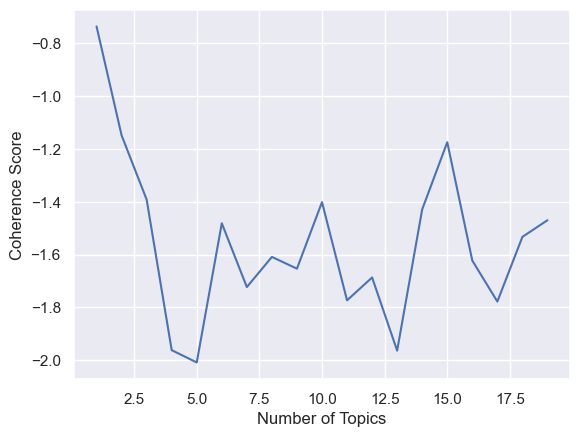

In [169]:
#Calculating the coherence score using C_umass to measure the degree of semantic similarity between high scoring words in each topic
topics = []
score = []
for i in range (1,20,1):   
  lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)   
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')   
  topics.append(i)
  score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

09/24/2023 07:18:53 PM - using symmetric alpha at 1.0
09/24/2023 07:18:53 PM - using symmetric eta at 1.0
09/24/2023 07:18:53 PM - using serial LDA version on this node
09/24/2023 07:18:53 PM - running online LDA training, 1 topics, 10 passes over the supplied corpus of 70 documents, updating every 8000 documents, evaluating every ~70 documents, iterating 10x with a convergence threshold of 0.001000
09/24/2023 07:18:53 PM - training LDA model using 4 processes
09/24/2023 07:18:53 PM - PROGRESS: pass 0, dispatched chunk #0 = documents up to #70/70, outstanding queue size 1
09/24/2023 07:18:53 PM - topic #0 (1.000): 0.009*"attack" + 0.008*"report" + 0.008*"moscow" + 0.008*"force" + 0.008*"country" + 0.007*"drone" + 0.007*"include" + 0.006*"military" + 0.006*"people" + 0.006*"year"
09/24/2023 07:18:53 PM - topic diff=0.493700, rho=1.000000
09/24/2023 07:18:53 PM - -6.398 per-word bound, 84.3 perplexity estimate based on a held-out corpus of 70 documents with 11667 words
09/24/2023 07:18:5

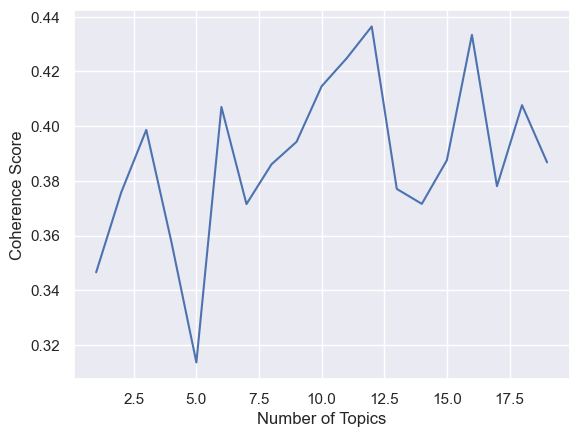

In [170]:
#Calculating the coherence score using C_v
topics = []
score = []
for i in range(1,20,1):  
  lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)   
  cm = CoherenceModel(model=lda_model, texts = news_df['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')   
  topics.append(i)
  score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [171]:
#Printing out the results
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=6, workers = 4, passes=100)
for top in lda_model.print_topics(10):
  print(top)

09/24/2023 07:19:43 PM - using symmetric alpha at 0.16666666666666666
09/24/2023 07:19:43 PM - using symmetric eta at 0.16666666666666666
09/24/2023 07:19:43 PM - using serial LDA version on this node
09/24/2023 07:19:43 PM - running online LDA training, 6 topics, 100 passes over the supplied corpus of 70 documents, updating every 8000 documents, evaluating every ~70 documents, iterating 100x with a convergence threshold of 0.001000
09/24/2023 07:19:43 PM - training LDA model using 4 processes
09/24/2023 07:19:43 PM - PROGRESS: pass 0, dispatched chunk #0 = documents up to #70/70, outstanding queue size 1
09/24/2023 07:19:43 PM - topic #4 (0.167): 0.010*"attack" + 0.009*"report" + 0.009*"damage" + 0.008*"putin" + 0.008*"state" + 0.008*"country" + 0.008*"moscow" + 0.007*"drone" + 0.007*"include" + 0.007*"soviet"
09/24/2023 07:19:43 PM - topic #0 (0.167): 0.012*"grain" + 0.009*"force" + 0.009*"country" + 0.009*"attack" + 0.008*"training" + 0.008*"military" + 0.008*"year" + 0.007*"include

(0, '0.011*"force" + 0.011*"grain" + 0.010*"way" + 0.009*"artillery" + 0.009*"training" + 0.009*"air" + 0.008*"child" + 0.008*"army" + 0.008*"include" + 0.007*"fire"')
(1, '0.029*"human" + 0.022*"peace" + 0.021*"bank" + 0.021*"account" + 0.018*"rights" + 0.018*"country" + 0.016*"summit" + 0.015*"center" + 0.013*"president" + 0.012*"right"')
(2, '0.015*"year" + 0.015*"country" + 0.014*"poland" + 0.014*"president" + 0.012*"company" + 0.011*"people" + 0.011*"tell" + 0.009*"find" + 0.009*"weapon" + 0.009*"supply"')
(3, '0.042*"drone" + 0.039*"attack" + 0.034*"moscow" + 0.030*"building" + 0.019*"ministry" + 0.018*"damage" + 0.018*"tuesday" + 0.017*"city" + 0.015*"strike" + 0.015*"defense"')
(4, '0.015*"international" + 0.015*"damage" + 0.014*"invasion" + 0.014*"support" + 0.014*"investment" + 0.012*"nation" + 0.012*"state" + 0.012*"soviet" + 0.011*"country" + 0.010*"provide"')
(5, '0.022*"report" + 0.016*"force" + 0.013*"accord" + 0.013*"july" + 0.012*"attack" + 0.011*"moscow" + 0.010*"mili

In [172]:
#Distribution of topics in a document
lda_model[corpus][0]

[(3, 0.9983716)]

In [173]:
#Visualization of topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

In [174]:
#Creating a new column for topics
news_df['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(news_df['Article']))]

In [175]:
#Counting frequency of every topic in a document
news_df.topic.value_counts()

0    41
2     9
1     8
3     6
5     4
4     2
Name: topic, dtype: int64

In [176]:
news_df.head()

,Date,Media,Title,Article,Summary,tokens,topic
0,01-08-2023,ABC News,Russia accuses Ukraine of drone attack on Mosc...,A view of the damaged building is seen in the ...,A view of the damaged building is seen in the ...,"[view, damage, building, see, moscow, city, bu...",3
1,01-08-2023,The Associated Press,Drone attacks in Moscow’s glittering business ...,The glittering towers of the Moscow City busin...,The glittering towers of the Moscow City busin...,"[glitter, tower, moscow, city, business, distr...",3
2,01-08-2023,PBS NewsHour,WATCH: Pentagon holds news briefing as Ukraine...,Pentagon press secretary Pat Ryder held a news...,Pentagon press secretary Pat Ryder held a news...,"[pentagon, press, secretary, pat, ryder, hold,...",3
3,01-08-2023,CNBC,Saudi Arabia and Turkey are emerging as the ne...,Turkish President Recep Tayyip Erdogan welcome...,Turkish President Recep Tayyip Erdogan welcome...,"[turkish, president, recep, tayyip, erdogan, w...",0
4,01-08-2023,Mexico News Daily,Mexico willing to participate in Ukraine peace...,The Ministry of Foreign Affairs (SRE) has said...,The Ministry of Foreign Affairs (SRE) has said...,"[ministry, foreign, affairs, sre, say, mexico,...",0
